In [1]:
%matplotlib inline

# Visualise im2col performance test results

We measure program execution time in function of block and grid size before and after optimisation. Results are visualised using heatmap in matplotlib.

In [88]:
from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 11.7,8.27
import numpy as np
import seaborn as sns

PERFLOG_BEFORE_PATH = "./log/perflog_write_coalescing.csv"
PERFLOG_AFTER_PATH = "./log/perflog_final.csv"
GRID_SHAPE = (12, 14)

# Load measurements
data_before = np.loadtxt(PERFLOG_BEFORE_PATH, delimiter=',')
data_after = np.loadtxt(PERFLOG_AFTER_PATH, delimiter=',')

## Preprocess data

In [89]:
before = data_before[:, 2].reshape(GRID_SHAPE)
after = data_after[:, 2].reshape(GRID_SHAPE)

## Visualise

/usr/lib64/python3.4/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


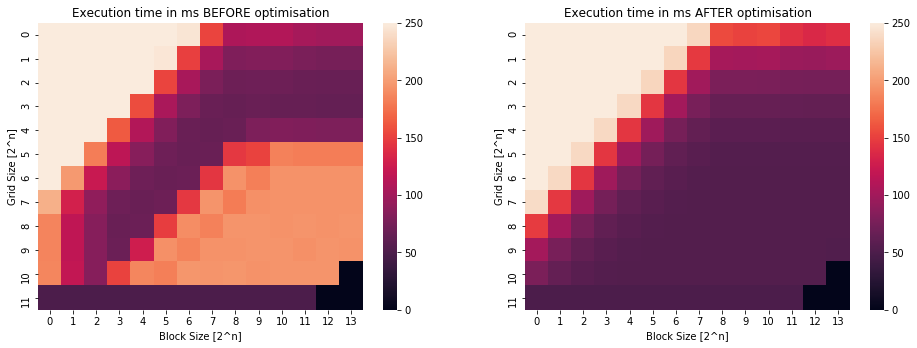

In [90]:
fig = plt.figure(figsize=plt.figaspect(0.33))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.heatmap(before, vmin=0, vmax=250, ax=ax1)
ax1.set_title('Execution time in ms BEFORE optimisation')
ax1.set_xlabel('Block Size [2^n]')
ax1.set_ylabel('Grid Size [2^n]')

sns.heatmap(after, vmin=0, vmax=250, ax=ax2)
ax2.set_title('Execution time in ms AFTER optimisation')
ax2.set_xlabel('Block Size [2^n]')
ax2.set_ylabel('Grid Size [2^n]')

fig.show()

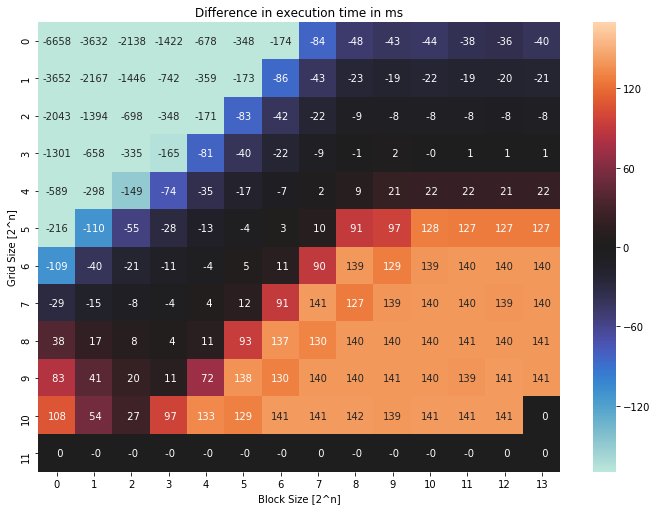

In [91]:
ax = sns.heatmap(before - after, vmin=-170, vmax=170, center=0, annot=True, fmt="3.0f")
ax.set_title('Difference in execution time in ms')
ax.set_xlabel('Block Size [2^n]')
ax.set_ylabel('Grid Size [2^n]')

plt.show()